## Employee attrition rate prediction

### Overview

In this article, we're going to discuss about employee attrition rate prediction i.e. how likely is it possible that employee will leave the current company (or will resign from the current company) and we will do this using several machine learning algorithms (basically 6 ML algo) but as always this article is gonna be completely step by step explanation. So let's get started. 

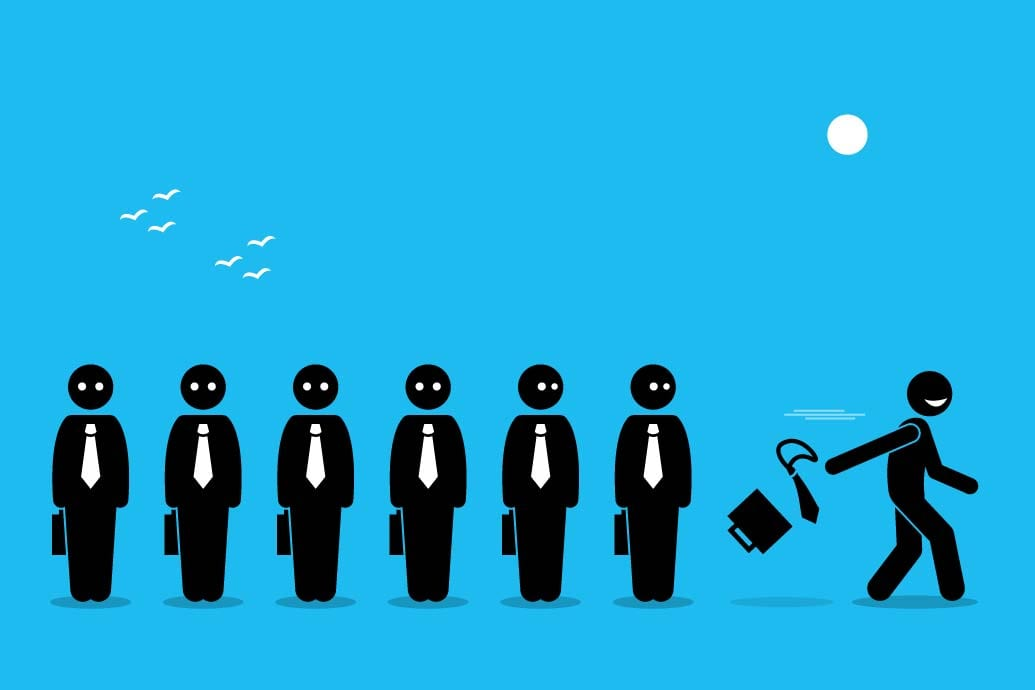

### Need of Employee Attrition rate prediction

1. Managing work force: If the supervisors or HR of the organization came to know about some employees that they might be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.
2. Smooth pipeline: If all the employees in the current project are working continously in a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the working also will be not so smooth
3. Hiring Management: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the hiring activities so that they can get the valuable asset whenever they need so for efficient flow of work.

### Table of content

1. Importing libraries
2. Data exploratation
3. Data cleaning 
4. Splitting data (train test split)
5. Model development
   * Logistic Regression
   * Decision tree
   * KNN
   * SVM
   * Random Forest
   * Naive Bayes
6. Saving model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
import os
# os.getcwd() # incase you are using colab

### Reading dataset

In [3]:
attrdata = pd.read_csv("Table_1.csv")

### Let's look at our dataset and plan to torchor it!

In [4]:
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,leave
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay


### Data exploration

In [5]:
attrdata.drop(0,inplace=True)

In [6]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
stay/leave               0
dtype: int64

In [7]:
attrdata.dropna(axis=0,inplace=True)

In [8]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
stay/leave               0
dtype: int64

In [9]:
attrdata.shape

(895, 16)

In [10]:
gender_dict = attrdata["Gender "].value_counts()
gender_dict

Male      655
Female    234
other       6
Name: Gender , dtype: int64

In [11]:
promoted_dict = attrdata["Promoted/Non Promoted"].value_counts()
promoted_dict

Promoted        457
Non Promoted    438
Name: Promoted/Non Promoted, dtype: int64

In [12]:
stay_dict = attrdata["stay/leave"].value_counts()
stay_dict

stay     592
leave    303
Name: stay/leave, dtype: int64

In [13]:
func_dict = attrdata["Function"].value_counts()
func_dict

Operation    831
Support       52
Sales         12
Name: Function, dtype: int64

In [14]:
Hiring_dict = attrdata["Hiring Source"].value_counts()
Hiring_dict

Direct               708
Agency               116
Employee Referral     71
Name: Hiring Source, dtype: int64

In [15]:
Marital_dict = attrdata["Marital Status"].value_counts()
print(Marital_dict)

Single    533
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: Marital Status, dtype: int64


In [16]:
Emp_dict = attrdata["Emp. Group"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)

B1             537
B2             275
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: Emp. Group, dtype: int64


In [17]:
job_dict = attrdata["Job Role Match"].value_counts()
job_dict

Yes    480
No     415
Name: Job Role Match, dtype: int64

In [18]:
tenure_dict = attrdata["Tenure Grp."].value_counts()
print(tenure_dict)

> 1 & < =3    626
< =1          269
Name: Tenure Grp., dtype: int64


### Data cleaning

In [19]:
# Build new dictionary to be used to categorize data column after
location_dict = attrdata["Location"].value_counts()
print(location_dict)

location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':         0,
}

print(location_dict_new)

Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           55
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64
{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


In [20]:
def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']
    
data_l = attrdata["Location"].apply(location)
attrdata['New Location'] = data_l
attrdata.head(40)

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay,1
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,stay,5
6,7,sid,9876544345,Pune,B2,Operation,Female,0.01,< =1,5.02,Single,28.02,Agency,Promoted,No,stay,3
7,8,sid,9876544345,Bangalore,B2,Operation,Male,0.01,< =1,5.11,Marr.,30.11,Agency,Promoted,No,leave,5
8,9,sid,9876544345,Bangalore,B2,Operation,Male,0.02,< =1,6.04,Marr.,33.05,Agency,Promoted,No,leave,5
9,10,sid,9876544345,Chennai,B2,Operation,Male,0.01,< =1,10.01,Div.,41.06,Direct,Promoted,Yes,stay,7
10,11,sid,9876544345,Noida,B1,Operation,Male,0.01,< =1,0.10,Single,27.10,Direct,Non Promoted,No,leave,6


In [21]:
# attrdata['Stay/Left']=attrdata['Stay/Left'].replace(['Left','leave'])

In [22]:
attrdata.head(40)

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay,1
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,stay,5
6,7,sid,9876544345,Pune,B2,Operation,Female,0.01,< =1,5.02,Single,28.02,Agency,Promoted,No,stay,3
7,8,sid,9876544345,Bangalore,B2,Operation,Male,0.01,< =1,5.11,Marr.,30.11,Agency,Promoted,No,leave,5
8,9,sid,9876544345,Bangalore,B2,Operation,Male,0.02,< =1,6.04,Marr.,33.05,Agency,Promoted,No,leave,5
9,10,sid,9876544345,Chennai,B2,Operation,Male,0.01,< =1,10.01,Div.,41.06,Direct,Promoted,Yes,stay,7
10,11,sid,9876544345,Noida,B1,Operation,Male,0.01,< =1,0.10,Single,27.10,Direct,Non Promoted,No,leave,6


In [23]:
gen = pd.get_dummies(attrdata["Function"])
gen.head()

,Operation,Sales,Support
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [24]:
hr = pd.get_dummies(attrdata["Hiring Source"])
hr.head()

,Agency,Direct,Employee Referral
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [25]:
# Marital Status
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'
    
data_l = attrdata["Marital Status"].apply(Mar)
attrdata['New Marital'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location,New Marital
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay,1,Marr.
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,stay,5,Marr.


In [26]:
Mr = pd.get_dummies(attrdata["New Marital"])
Mr.head()

,Marr.,Single,other status
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [27]:
#Promoted/Not Promoted
def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Promoted/Non Promoted"].apply(Promoted)
attrdata['New Promotion'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location,New Marital,New Promotion
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay,1,Marr.,0
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,stay,5,Marr.,1


In [28]:
# Employee Group
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}


def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
    
data_l = attrdata["Emp. Group"].apply(emp)
attrdata['New EMP'] = data_l

emp = pd.get_dummies(attrdata["New EMP"])
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location,New Marital,New Promotion,New EMP
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,stay,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,stay,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,stay,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,stay,1,Marr.,0,B2
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,stay,5,Marr.,1,B3


In [29]:
#Job Role Match
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Job Role Match"].apply(Job)
attrdata['New Job Role Match'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location,New Marital,New Promotion,New EMP,New Job Role Match
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,stay,6,Marr.,1,other group,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,stay,6,Marr.,1,B2,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,stay,1,Marr.,0,B2,1
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,39.09,Direct,Promoted,No,stay,5,Marr.,1,B3,0


In [30]:
# Gender
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'
    
data_l = attrdata["Gender "].apply(Gen)
attrdata['New Gender'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Hiring Source,Promoted/Non Promoted,Job Role Match,stay/leave,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,Direct,Promoted,No,stay,6,Marr.,1,other group,0,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,Direct,Promoted,Yes,stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,Direct,Promoted,Yes,stay,6,Marr.,1,B2,1,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,Direct,Non Promoted,Yes,stay,1,Marr.,0,B2,1,Male
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,Direct,Promoted,No,stay,5,Marr.,1,B3,0,Male


In [31]:
gend = pd.get_dummies(attrdata["New Gender"])
gend.head()

,Female,Male,other
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [32]:
tengrp = pd.get_dummies(attrdata["Tenure Grp."])
tengrp.head()

,< =1,> 1 & < =3
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [33]:
dataset = pd.concat([attrdata, hr, Mr, emp, tengrp, gen, gend], axis = 1)

In [34]:
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,0,1,1,0,0,0,1,0,1,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,1,0,1,0,1,0,0,0,1,0
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,0,0,1,0,1,0,0,0,1,0
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,0,0,1,0,1,0,0,0,1,0
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,1,0,1,0,1,0,0,0,1,0


In [35]:
dataset.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'stay/leave', 'New Location',
       'New Marital', 'New Promotion', 'New EMP', 'New Job Role Match',
       'New Gender', 'Agency', 'Direct', 'Employee Referral', 'Marr.',
       'Single', 'other status', 'B1', 'B2', 'B3', 'other group', '< =1',
       '> 1 & < =3', 'Operation', 'Sales', 'Support', 'Female', 'Male',
       'other'],
      dtype='object')

In [36]:
dataset.drop(["name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure', 'New Gender', 'New Marital', 'New EMP'],axis=1,inplace=True)

In [37]:
dataset1 = dataset.drop(['Tenure Grp.', 'phone number',"table id"], axis = 1)

In [38]:
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'stay/leave', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')

In [39]:
dataset1.head()

,Experience (YY.MM),Age in YY.,stay/leave,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
1,13.00,38.08,stay,6,1,0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
2,16.05,36.04,stay,5,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
3,6.06,32.07,stay,6,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,7.00,32.05,stay,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5,9.01,39.09,stay,5,1,0,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0


In [40]:
# Target 
"""
def Target(x):
    if x in "stay":
        return False
    else:
        return True
    
data_l = dataset1["stay/Left"].apply(Target)
dataset1['Stay/Left'] = data_l
"""

'\ndef Target(x):\n    if x in "stay":\n        return False\n    else:\n        return True\n    \ndata_l = dataset1["stay/Left"].apply(Target)\ndataset1[\'Stay/Left\'] = data_l\n'

In [41]:
dataset1.to_csv("processed_table.csv")

In [42]:
dataset = pd.read_csv("processed_table.csv")
dataset = pd.DataFrame(dataset)
dataset.rename(columns={'Unnamed: 0':'Employee_Id'},inplace=True)
y = dataset["stay/leave"]
X = dataset.drop("stay/leave",axis=1)

### Splitting data - Train test split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [44]:
X_train.head()

,Employee_Id,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
684,688,4.09,26.06,5,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
220,224,2.08,26.00,6,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
476,480,7.11,29.06,2,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
431,435,3.00,25.02,6,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
868,872,7.00,28.06,5,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0


### Model Development

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [46]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [47]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.891061
[Logistic Regression] test data accuracy is : 0.877095
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.849162
[KNN] training data accuracy is : 0.804469
[KNN] test data accuracy is : 0.586592
[SVM] training data accuracy is : 0.878492
[SVM] test data accuracy is : 0.865922
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.877095
[Naive Bayes] training data accuracy is : 0.870112
[Naive Bayes] test data accuracy is : 0.826816


### Different Model Scores (accuracy)

In [48]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }

In [49]:
model_scores

{'Logistic Regression': 0.8770949720670391,
 'KNN classifier': 0.5865921787709497,
 'Support Vector Machine': 0.8659217877094972,
 'Random forest': 0.8770949720670391,
 'Decision tree': 0.8491620111731844,
 'Naive Bayes': 0.8268156424581006}

## Model Comparison

In [50]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.877095,0.586592,0.865922,0.877095,0.849162,0.826816


<AxesSubplot: >

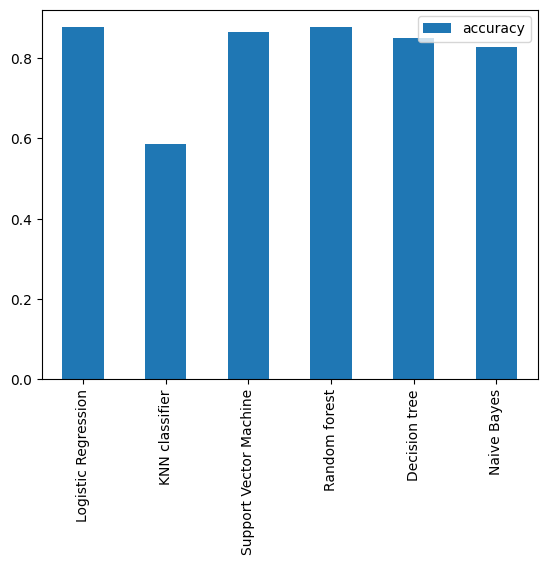

In [51]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

<AxesSubplot: >

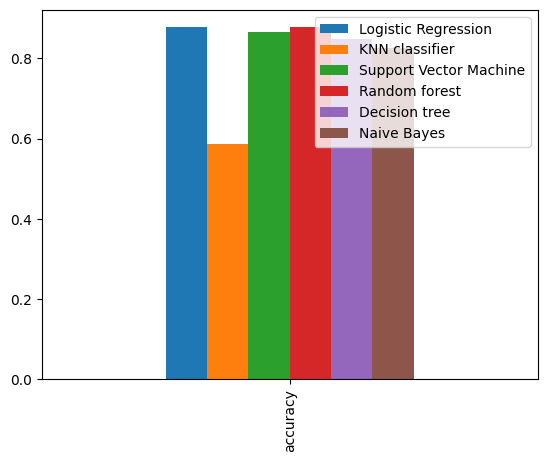

In [52]:
model_compare.plot(kind='bar') # (Not transposing the legends and y axis)

Yes, we can see that Random Forest has 1% better accuracy than Logisitic regression but Random Forest is a overfitted model hence we will select Logistic regression as our final model

### Feature importance

In [53]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable
# Logistic regression

feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'Employee_Id': -0.0003696386250124699,
 'Experience (YY.MM)': 0.13976826903326275,
 'Age in YY.': -0.019622030131004976,
 'stay/leave': 0.024627352540820286,
 'New Location': 0.0966651206507236,
 'New Promotion': 2.753336139632808,
 'New Job Role Match': -0.3131234848928494,
 'Agency': -0.020270885153253357,
 'Direct': 0.2047872081486371,
 'Employee Referral': 0.38796318779871986,
 'Marr.': -0.5042922677759638,
 'Single': -0.012278081920225987,
 'other status': -0.2203119715468735,
 'B1': 0.17649315193060666,
 'B2': -0.09367965850696437,
 'B3': 0.00889131622576651,
 'other group': -0.1299337324761386,
 '< =1': 0.0013265705786735561,
 '> 1 & < =3': -0.0594948415090563,
 'Operation': -0.018200464251593364,
 'Sales': -0.050911856136825424,
 'Support': 0.12249364800087131,
 'Female': -0.19516060227757395,
 'Male': -0.05594020762076669}

<AxesSubplot: title={'center': 'Feature Importance'}>

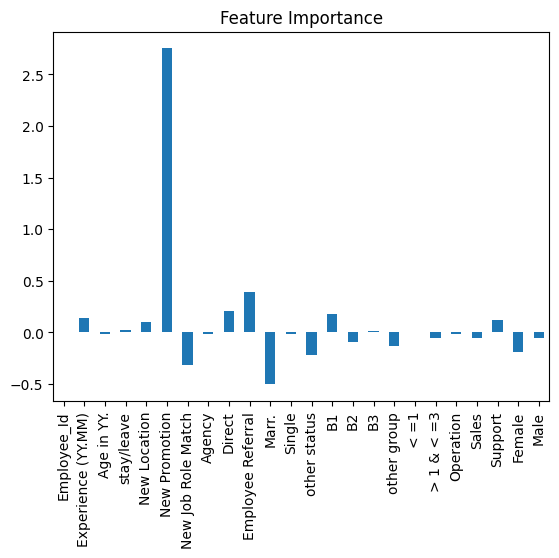

In [54]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

As we can see that "New promotion" column has the highest feature importance

### Saving model

In [55]:
# Logistic Regression model because it has best accuracy as well it is neither overfitted nor underfitted

model = lr.fit(X_train,y_train)

import pickle
# save the model to disk
filename = 'finalized_model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [56]:
with open('finalized_model.pickle', 'rb') as f:
    model_pickle = pickle.load(f)

In [57]:
model_pickle.predict(X_test)

array(['leave', 'leave', 'stay', 'leave', 'stay', 'stay', 'stay', 'leave',
       'stay', 'leave', 'stay', 'stay', 'stay', 'stay', 'leave', 'stay',
       'stay', 'stay', 'stay', 'stay', 'stay', 'stay', 'stay', 'leave',
       'leave', 'stay', 'leave', 'stay', 'stay', 'leave', 'stay', 'stay',
       'stay', 'leave', 'leave', 'stay', 'leave', 'stay', 'stay', 'stay',
       'leave', 'stay', 'stay', 'leave', 'stay', 'stay', 'leave', 'stay',
       'leave', 'stay', 'leave', 'stay', 'stay', 'stay', 'stay', 'leave',
       'leave', 'stay', 'leave', 'leave', 'stay', 'stay', 'leave', 'stay',
       'stay', 'stay', 'stay', 'stay', 'stay', 'leave', 'stay', 'leave',
       'stay', 'stay', 'stay', 'stay', 'stay', 'leave', 'stay', 'leave',
       'stay', 'leave', 'stay', 'stay', 'stay', 'stay', 'stay', 'stay',
       'leave', 'leave', 'leave', 'stay', 'leave', 'stay', 'stay', 'stay',
       'stay', 'leave', 'stay', 'leave', 'stay', 'leave', 'leave', 'stay',
       'leave', 'stay', 'stay', 'leave', 

In [58]:
X_test.head()

,Employee_Id,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
881,885,5.04,28.11,5,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
675,679,2.07,24.06,7,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
238,242,5.08,32.02,4,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
328,332,1.03,24.09,6,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
539,543,1.11,25.11,6,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [59]:
X_test.columns

Index(['Employee_Id', 'Experience (YY.MM)', 'Age in YY.', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')

In [60]:
model_pickle.predict(X_test.head())

array(['leave', 'leave', 'stay', 'leave', 'stay'], dtype=object)

In [61]:
test_emp_1 = X_test.iloc[0:1]

In [62]:
test_emp_1

,Employee_Id,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
881,885,5.04,28.11,5,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [63]:
test_emp_1.set_index("Employee_Id")

,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,Single,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
Employee_Id,,,,,,,,,,,,,,,,,,,,,
885,5.04,28.11,5,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [64]:
print(test_emp_1.columns)

Index(['Employee_Id', 'Experience (YY.MM)', 'Age in YY.', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')


In [65]:
# test_emp_1.rename(columns={'Unnamed: 0':'Employee_Id'},inplace=True)

In [66]:
a=model_pickle.predict(test_emp_1)
emp_id = int(X_test.iloc[0][0])  
print("The employee ID-",emp_id,"will eventually",a[0])

The employee ID- 885 will eventually leave


In [67]:
a[0]

'leave'

In [68]:
emp_id = X_test.iloc[0][0]

In [69]:
int(emp_id) 

885